從[CSV files for download](https://www.stats.govt.nz/large-datasets/csv-files-for-download/)中挑出[Annual enterprise survey: 2023 financial year (provisional) – CSV](https://www.stats.govt.nz/assets/Uploads/Annual-enterprise-survey/Annual-enterprise-survey-2023-financial-year-provisional/Download-data/annual-enterprise-survey-2023-financial-year-provisional.csv)作為爬蟲的檔案，並進行分析

In [18]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

# 定義 URL
url = 'https://www.stats.govt.nz/assets/Uploads/Annual-enterprise-survey/Annual-enterprise-survey-2023-financial-year-provisional/Download-data/annual-enterprise-survey-2023-financial-year-provisional.csv'

# 爬取網址內容
response = requests.get(url)
response.encoding = 'utf-8'  # 確保編碼正確

# 將內容轉換為 DataFrame
data = pd.read_csv(StringIO(response.text))

# 顯示資料
display(data.head())  # 查看前幾行

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2023,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,930995,ANZSIC06 divisions A-S (excluding classes K633...
1,2023,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,821630,ANZSIC06 divisions A-S (excluding classes K633...
2,2023,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,84354,ANZSIC06 divisions A-S (excluding classes K633...
3,2023,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,25010,ANZSIC06 divisions A-S (excluding classes K633...
4,2023,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,832964,ANZSIC06 divisions A-S (excluding classes K633...


<class 'pandas.core.frame.DataFrame'>


時間趨勢分析：如果有多年份的資料，則趨勢分析能揭示收入與支出的長期關係，是否存在某些特定年份的異常波動，例如在疫情期間是否出現支出激增的情況。

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2023,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,930995.0,ANZSIC06 divisions A-S (excluding classes K633...
4,2023,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,832964.0,ANZSIC06 divisions A-S (excluding classes K633...
31,2023,Level 1,AA,"Agriculture, Forestry and Fishing",Dollars (millions),H01,Total income,Financial performance,54462.0,ANZSIC06 division A
36,2023,Level 1,AA,"Agriculture, Forestry and Fishing",Dollars (millions),H08,Total expenditure,Financial performance,48377.0,ANZSIC06 division A
62,2023,Level 3,AA11,Horticulture and Fruit Growing,Dollars (millions),H01,Total income,Financial performance,6011.0,"ANZSIC06 groups A011, A012, and A013"
...,...,...,...,...,...,...,...,...,...,...
50889,2013,Level 4,RS212,"Personal Care, Funeral and Other Personal Serv...",Dollars (millions),H08,Total expenditure,Financial performance,NaN,"ANZSIC06 groups S951, S952, and S953"
50917,2013,Level 4,RS214,"Civil, Professional and Other Interest Groups",Dollars (millions),H01,Total income,Financial performance,NaN,ANZSIC06 group S955
50921,2013,Level 4,RS214,"Civil, Professional and Other Interest Groups",Dollars (millions),H08,Total expenditure,Financial performance,NaN,ANZSIC06 group S955
50949,2013,Level 3,ZZ11,Food product manufacturing,Dollars (millions),H01,Total income,Financial performance,NaN,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."


<ipython-input-25-b593f7c504db>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Value'] = pd.to_numeric(filtered_data['Value'], errors='coerce')


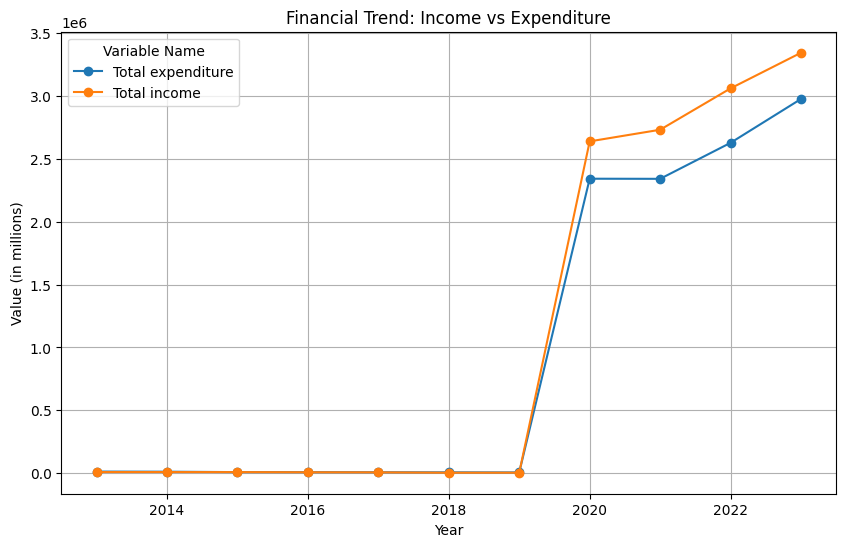

In [25]:
# 過濾 Total income 和 Total expenditure
filtered_data = data[data['Variable_name'].isin(['Total income', 'Total expenditure'])]


# 確保數據為數值型
filtered_data['Value'] = pd.to_numeric(filtered_data['Value'], errors='coerce')

# 按年份和變數分組，計算總和
trend_data = filtered_data.groupby(['Year', 'Variable_name'])['Value'].sum().unstack()

# 畫出趨勢圖
trend_data.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Financial Trend: Income vs Expenditure')
plt.xlabel('Year')
plt.ylabel('Value (in millions)')
plt.grid()
plt.legend(title='Variable Name')
plt.show()


行業比較分析：第三個方法提供了行業的深入洞察，哪些行業的總收入最高，可以幫助進一步研究其成長動力或政策影響。

                                  Industry_name_NZSIOC      Value
7                                       All industries  3270933.0
117                                    Wholesale Trade   525533.0
60                                       Manufacturing   501485.0
99                      Retail Trade and Accommodation   420100.0
35                    Financial and Insurance Services   338833.0
22                                        Construction   332728.0
23                               Construction Services   274290.0
86   Professional, Scientific, Technical, Administr...   262150.0
33                                             Finance   257677.0
37                          Food Product Manufacturing   207985.0


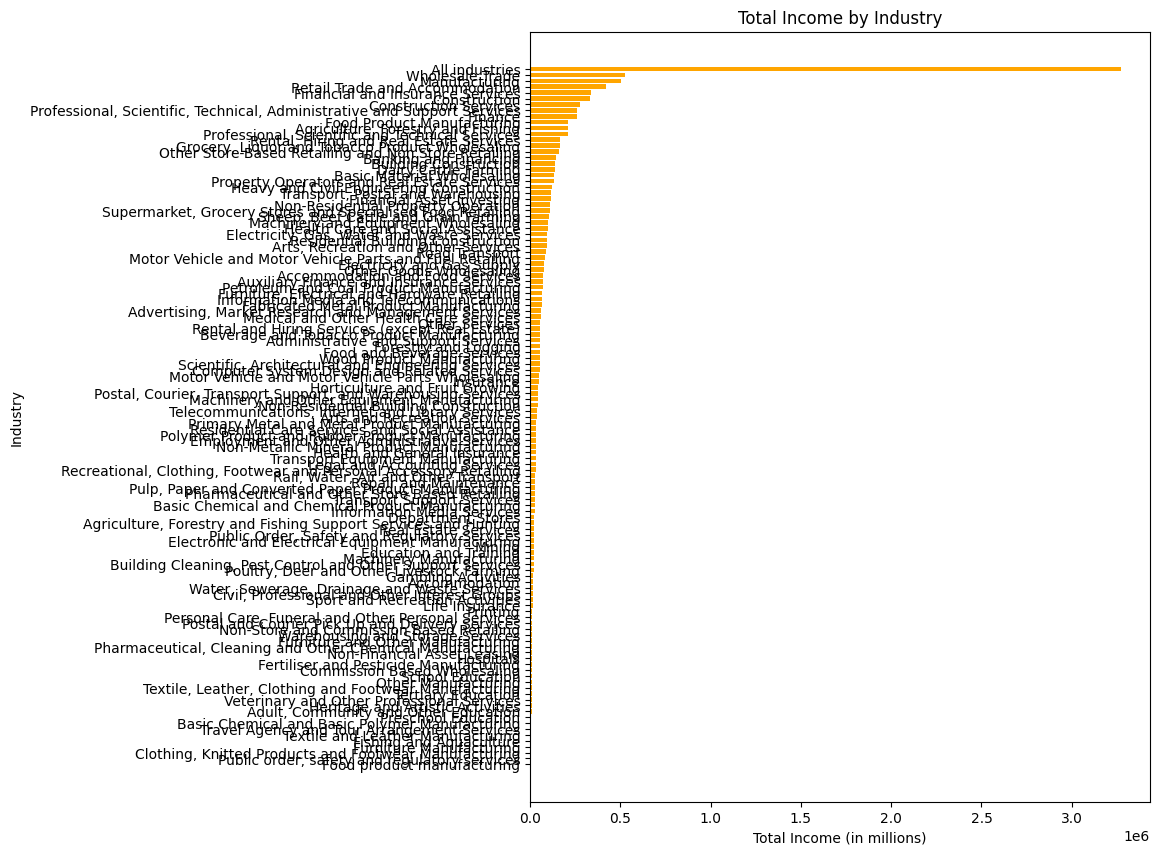

In [26]:
# 過濾出 Total income 的資料
income_data = data[data['Variable_name'] == 'Total income']

# 按行業分組，計算總值
industry_income = income_data.groupby('Industry_name_NZSIOC')['Value'].sum().reset_index()

# 顯示結果
print(industry_income.sort_values(by='Value', ascending=False).head(10))

# 繪製水平條形圖
industry_income = industry_income.sort_values(by='Value', ascending=True)
plt.figure(figsize=(8, 10))
plt.barh(industry_income['Industry_name_NZSIOC'], industry_income['Value'], color='orange')
plt.xlabel('Total Income (in millions)')
plt.ylabel('Industry')
plt.title('Total Income by Industry')
plt.show()


HW1 將爬蟲下來的JSON資料轉成CSV

In [ ]:
import requests
import json
import pandas as pd
web = requests.get('https://data.kcg.gov.tw/dataset/6f29f6f4-2549-4473-aa90-bf60d10895dc/resource/30dfc2cf-17b5-4a40-8bb7-c511ea166bd3/download/lightrailtraffic.json')
data = json.loads(web.content.decode('utf-8-sig')) # 手动处理 UTF-8 BOM
#print(data)

# 轉換為 DataFrame
df = pd.DataFrame(data)
display(df)

# 將 DataFrame 儲存為 CSV 檔案
output_file = 'output.csv'
df.to_csv(output_file, index=False, encoding='utf-8-sig')  # 保存 CSV 時添加 UTF-8 BOM

,年,月,總運量,日均運量,假日均運量,月台上刷卡日均筆數,車上刷卡日均筆數,售票機日均筆數,補票日均筆數,團體票日均筆數,人工售票日均筆數,備註,QR-CODE日均筆數
0,107,1,275360,8883,15132,1734.2,5495.9,1516.8,9.4,126.3,NaN,NaN,NaN
1,107,2,413815,14779,20738,3854.9,9039.8,1754.9,11.9,117.7,NaN,NaN,NaN
2,107,3,209783,6767,13198,1413.2,4487.5,660.7,6.5,199.2,NaN,NaN,NaN
3,107,4,283651,9455,16656,2183.7,6013.8,944.5,6.3,306.8,NaN,NaN,NaN
4,107,5,206325,6656,11573,1385.8,4331.5,558.6,7.1,372.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,113,6,936946,31232,37612,27698.4,0,873.1,NaN,NaN,499.1,,2160.9
78,113,7,904543,30151,38032,26764.8,0,956.2,NaN,NaN,538.4,7月24日至26日受凱米颱風影響,1892
79,113,8,1008981,32548,40730,28790.2,0,1088.3,NaN,NaN,704.0,,1965.3
80,113,9,928172,30939,34988,26822,0,731.3,NaN,NaN,765.1,,2620.7


以下皆為課堂練習

In [ ]:
import requests
url = 'https://zh.wikipedia.org/zh-tw/%E6%88%96%E9%9D%9E%E9%97%A8'
# 假的headers 資訊
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36'}
# 加入headers 資訊
web = requests.get(url, headers=headers)
web.encoding = 'utf8'
print(web.text)


<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="zh-Hant-TW" dir="ltr">
<head>
<meta charset="UTF-8">
<title>反或閘 - 維基百科，自由的百科全書</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-fe

In [ ]:
import requests
import json
web = requests.get('https://data.kcg.gov.tw/dataset/6f29f6f4-2549-4473-aa90-bf60d10895dc/resource/30dfc2cf-17b5-4a40-8bb7-c511ea166bd3/download/lightrailtraffic.json')
data = json.loads(web.content.decode('utf-8-sig')) # 手动处理 UTF-8 BOM
print(data)

[{'年': 107, '月': 1, '總運量': 275360, '日均運量': 8883, '假日均運量': 15132, '月台上刷卡日均筆數': 1734.2, '車上刷卡日均筆數': 5495.9, '售票機日均筆數': 1516.8, '補票日均筆數': 9.4, '團體票日均筆數': 126.3}, {'年': 107, '月': 2, '總運量': 413815, '日均運量': 14779, '假日均運量': 20738, '月台上刷卡日均筆數': 3854.9, '車上刷卡日均筆數': 9039.8, '售票機日均筆數': 1754.9, '補票日均筆數': 11.9, '團體票日均筆數': 117.7}, {'年': 107, '月': 3, '總運量': 209783, '日均運量': 6767, '假日均運量': 13198, '月台上刷卡日均筆數': 1413.2, '車上刷卡日均筆數': 4487.5, '售票機日均筆數': 660.7, '補票日均筆數': 6.5, '團體票日均筆數': 199.2}, {'年': 107, '月': 4, '總運量': 283651, '日均運量': 9455, '假日均運量': 16656, '月台上刷卡日均筆數': 2183.7, '車上刷卡日均筆數': 6013.8, '售票機日均筆數': 944.5, '補票日均筆數': 6.3, '團體票日均筆數': 306.8}, {'年': 107, '月': 5, '總運量': 206325, '日均運量': 6656, '假日均運量': 11573, '月台上刷卡日均筆數': 1385.8, '車上刷卡日均筆數': 4331.5, '售票機日均筆數': 558.6, '補票日均筆數': 7.1, '團體票日均筆數': 372.7}, {'年': 107, '月': 6, '總運量': 213372, '日均運量': 7112, '假日均運量': 11818, '月台上刷卡日均筆數': 1601.2, '車上刷卡日均筆數': 4673, '售票機日均筆數': 644.2, '補票日均筆數': 7, '團體票日均筆數': 186.9}, {'年': 107, '月': 7, '總運量': 323385, '日均運量': 10432, '假日均運量':

In [ ]:
!pip install beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
url = 'https://water.taiwanstat.com/'
web = requests.get(url)
# soup = BeautifulSoup(web.text, "html.parser")  # 使用html.parser 解析器
soup = BeautifulSoup(web.text, "html5lib")     # 使用 html5lib 解析器
title = soup.title
print(title)

<title>台灣水庫即時水情</title>


In [ ]:
from bs4 import BeautifulSoup
import requests as rq
#we need to request a web site
url = 'https://water.taiwanstat.com/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36'}
response = rq.get(url, headers = headers, timeout=2)
html = response.content
#print(html)
soup = BeautifulSoup(html, "html.parser") # create a new bs4 object from the html data loaded
print(soup)

soup = BeautifulSoup(html, "html.parser")
for script in soup(["script", "style"]):
  script.extract()
  # get text
  text = soup.get_text()
  # create a new bs4 object from the html data loaded
  # remove all javascript and stylesheet code
  # break into lines and remove leading and trailing space on each
  lines = (line.strip() for line in text.splitlines())
  # break multi-headlines into a line each
  chunks = (phrase.strip() for line in lines for phrase in line.split(" "))
  # drop blank lines
  texts = '\n'.join(chunk for chunk in chunks if chunk)
print(texts)

<!DOCTYPE html>
<html lang="zh-TW" xmlns="http://www.w3.org/1999/xhtml"><head><meta content="台灣水庫即時水情" property="og:title"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="台灣水庫即時水情" property="og:site_name"/><meta content="台灣水庫即時水情-視覺化, 即時蓄水量、水位變化..." property="og:description"/><meta content="http://i.imgur.com/04AFcnA.png" property="og:image"/><meta content="image/png" property="og:image:type"/><meta content="Chi-Hsuan Huang" name="author"/><meta content="Po-An Yang" name="citation_authors"/><meta content="台灣水庫即時水情-視覺化, 即時蓄水量、水位變化" name="description"/><title>台灣水庫即時水情</title><meta content="zh_TW" property="og:locale"/><meta content="width=device-width,initial-scale=1" name="viewport"/><link href="//static.taiwanstat.com/favicon.ico" rel="icon" type="image/png"/><link href="//static.taiwanstat.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="//static.taiwanstat.com/css/style.min.css" rel="stylesheet"/><link href="//storage.googleapi

In [ ]:
from bs4 import BeautifulSoup
import requests as rq
#we need to request a web site
url = 'https://tw.sports.yahoo.com/news/12%E5%BC%B7%E8%B3%BD-%E5%BC%B7%E5%88%B0%E5%83%8F%E5%9C%A8%E9%96%8B%E5%A4%96%E6%8E%9B-%E9%99%B3%E5%82%91%E6%86%B2%E5%BE%8C%E8%A2%AB%E8%A6%81%E6%B1%82%E8%97%A5%E6%AA%A2-071049117.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAMo-GtySdovuvNSHrXanMxyT5IedlcauS3Ha_XVeSCyI25T4IgaUW35tMZBq7BukqJcxPlfDLUTnRidZPI8odMNiRHfrDRA1-4AQW96fUTarepqXmQFrBepeUgxqZgIsZLX1BS7leekEOcdbE-IKH2hW1flnMuNN6nBmg3AKfCQg'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36'}
response = rq.get(url, headers = headers, timeout=2)
html = response.content
#print(html)
soup = BeautifulSoup(html, "html.parser") # create a new bs4 object from the html data loaded
#print(soup)

soup = BeautifulSoup(html, "html.parser")
for script in soup(["script", "style"]):
  script.extract()
  # get text
  text = soup.get_text()
  # create a new bs4 object from the html data loaded
  # remove all javascript and stylesheet code
  # break into lines and remove leading and trailing space on each
  lines = (line.strip() for line in text.splitlines())
  # break multi-headlines into a line each
  chunks = (phrase.strip() for line in lines for phrase in line.split(" "))
  # drop blank lines
  texts = '\n'.join(chunk for chunk in chunks if chunk)
print(texts)

12強賽／強到像在開外掛！陳傑憲後被要求藥檢
直接進入導覽直接進入主要內容直接進入相關內容
首頁
電子信箱
新聞
股市
氣象
運動
Yahoo
TV
App
下載
購物中心
拍賣
更多...
Yahoo奇摩運動
搜尋查詢
登入
信箱
登入
以檢視您的信件
運動首頁
世界12強
12強賽事懶人包
賽程
戰績
中華隊點將錄
必看球星
啦啦隊
CT
AMAZE
｜最強跑鞋應援｜
NBA
NBA新賽季
NBA首頁
比分/賽程
戰績
球隊資料
球員資料
運彩這樣玩
運動生活
運動生活首頁
全方位健身指南
全方位減脂指南
全方位單車指南
全方位路跑指南
MLB
大谷翔平Sho-time
MLB休賽季
MLB首頁
比分/賽程
戰績
MLB精華
球隊資料
球員資料
中華職棒
Yahoo好棒棒
中職首頁
比分/賽程
球員資料
球隊資料
精采好球
中信兄弟影音
樂天桃猿影音
味全龍影音
統一獅影音
富邦悍將影音
台鋼雄鷹影音
中職影音
專欄
足球
籃球
HBL
籃球首頁
籃球影音
網球
網球首頁
影音
Yahoo好棒棒
運動新聞
中職
MLB精華
籃球
WOWSight
緯來體育台
中信兄弟
樂天桃猿
味全龍
統一獅
富邦悍將
台鋼雄鷹
TPGA
Winnie的瑜珈教室
凱蒂瑜珈Flow
With
Katie
高球
高球首頁
羅開高爾夫
GOLF
101
F1
F1首頁
F1精華
日職
日職首頁
HBL
…
廣告民視12強賽／強到像在開外掛！陳傑憲後被要求藥檢閱讀全文民視新聞網2024年11月21日
上午2:10體育中心／李明融報導世界棒球12強賽進入到4強循環賽階段，今天（21日）台灣隊首戰面對委內瑞拉，儘管最終以2比0吞下首敗，但「台灣隊長」陳傑憲的超狂表現引發官方關注，單場4個打席全上壘，包括敲出3安「猛打賞」，該場比賽結束之後打擊率是超水準的6成67，賽後官方還要求他接受藥檢。12強賽／強到像在開外掛！陳傑憲「.667打擊率」被關注
賽後被要求藥檢陳傑憲在12強賽表現火燙，成為台灣隊史首位在12強多次繳出猛打賞球員。（圖／翻攝自統一獅粉絲團臉書）陳傑憲在12強賽表現火燙，不僅帥氣外型被外國媒體關注，就連打擊、守備都繳出超水準的表現，他在今日面對委內瑞拉，4個打席全上壘，除一次觸身球保送之外，另外3次打席都擊出安打，繳出「猛打賞」表現，成為繼2015年林智勝、王柏融，以及2019

In [ ]:
import requests
from bs4 import BeautifulSoup
url = 'https://www.ptt.cc/'
web = requests.get('https://www.ptt.cc/bbs/Gossiping/index.html', cookies={'over18':'1'})
soup = BeautifulSoup(web.text, "html.parser")
titles = soup.find_all('div', class_='title') # 取得class 為title的div 內容
for i in titles:
  if i.find('a') != None:   # 判斷如果不為None
    print(i.find('a').get_text())  # 取得 div 裡 a 的內容，使用get_text() 取得文字
    print(url + i.find('a')['href'], end='\n\n')  # 使用 ['href'] 取得href 的屬性

Re: [爆卦] 俄羅斯向烏克蘭發射洲際彈道飛彈（ICBM）
https://www.ptt.cc//bbs/Gossiping/M.1732178993.A.28A.html

[問卦] 政府是不是維持最基本功能就好
https://www.ptt.cc//bbs/Gossiping/M.1732179008.A.E96.html

[問卦] 洲際彈道飛彈 飛到太空中 還需要警報嗎?
https://www.ptt.cc//bbs/Gossiping/M.1732179062.A.6D9.html

[問卦] 內雙的人是不是有時候會變外雙
https://www.ptt.cc//bbs/Gossiping/M.1732179084.A.B21.html

Re: [問卦] 數發部弄這衝三小？
https://www.ptt.cc//bbs/Gossiping/M.1732179103.A.65B.html

[問卦] 台積一堆謝等級的主管真的假的？
https://www.ptt.cc//bbs/Gossiping/M.1732179161.A.D72.html

謝遺容的年薪
https://www.ptt.cc//bbs/Gossiping/M.1732179329.A.37D.html

[問卦] 文組想問 AI伺服器 跟楓之谷伺服器一樣嗎？
https://www.ptt.cc//bbs/Gossiping/M.1732179355.A.E74.html

[問卦] 如果用海參崴換基輔 值得嗎
https://www.ptt.cc//bbs/Gossiping/M.1732179400.A.CCD.html

[問卦] 謝宜容跟虐死凱凱保母 長相有像嗎
https://www.ptt.cc//bbs/Gossiping/M.1732179430.A.A44.html

[問卦] 烏克蘭會被種香菇嗎？
https://www.ptt.cc//bbs/Gossiping/M.1732179447.A.4A8.html

[問卦] 現實中  你敢惹宜容嗎？  就問一句
https://www.ptt.cc//bbs/Gossiping/M.1732179522.A.22F.html

[問卦] 諾蘭會怎麼拍霸凌事件？
https://www.ptt.cc//bb

In [ ]:
import requests
from bs4 import BeautifulSoup
web = requests.get('https://www.ptt.cc/bbs/Beauty/M.1710593264.A.578.html', cookies={'over18':'1'}) # 傳送 Cookies 資訊後，抓取頁面內容
soup = BeautifulSoup(web.text, "html.parser") # 使用BeautifulSoup 取得網頁結構
imgs = soup.find_all('img') # 取得所有 img tag 的內容
for i in imgs:
  print(i['src'])

https://cache.ptt.cc/c/https/i.imgur.com/zSCKh5fl.jpg?e=1732369864&s=KmjRfK3B_arIFjHokcja1g
https://cache.ptt.cc/c/https/i.imgur.com/4Xfq2nrl.jpg?e=1732374541&s=EIcX0hS46H0kjswqWvnVcg
https://cache.ptt.cc/c/https/i.imgur.com/vJIMY03l.jpg?e=1732318836&s=HgNLPDkK1jgoN5umrFwkEw
https://cache.ptt.cc/c/https/i.imgur.com/wKWzZBfl.jpg?e=1732317043&s=GXppg4TaL4-TvNtsXQInSg
https://cache.ptt.cc/c/https/i.imgur.com/5a24s64l.jpg?e=1732332807&s=-lS9175ldxcWjB2Wtkx5Bg
https://cache.ptt.cc/c/https/i.imgur.com/3bPuFPyl.jpg?e=1732357271&s=jiFDOjw3ZgyfYvwo7kiPBw
https://cache.ptt.cc/c/https/i.imgur.com/FfVPpXyl.jpg?e=1732331817&s=WQQv0A8Gp-a6pCdQzZ5eSQ
https://cache.ptt.cc/c/https/i.imgur.com/jGCMjBil.jpg?e=1732371362&s=NkRn4o0108IJam7KfyK_lg
https://cache.ptt.cc/c/https/i.imgur.com/jDLMlT9l.jpg?e=1732358656&s=_Sj8dIWJ7hM__skUklJqhQ
https://cache.ptt.cc/c/https/i.imgur.com/ACsDTnel.jpg?e=1732367376&s=0av-xekOQjj5I_o136sZMQ
https://cache.ptt.cc/c/https/i.imgur.com/XPvU2SUl.jpg?e=1732339029&s=4WZqJOfcv1H

In [ ]:
import requests
from bs4 import BeautifulSoup
import os
from google.colab import drive
# 挂载Google Drive（可选，如果需要保存到云端硬盘）
drive.mount('/content/drive')
# 定义并创建保存图片的目录
save_dir = '/content/drive/MyDrive/ Notebooks/download/'
if not os.path.exists(save_dir):
  os.makedirs(save_dir)
web = requests.get('https://www.ptt.cc/bbs/Beauty/M.1710593264.A.578.html',
cookies={'over18':'1'})
soup = BeautifulSoup(web.text, "html.parser")
imgs = soup.find_all('img')
name = 0    # 设定图片编号
for i in imgs:
  print(i['src'])
  jpg = requests.get(i['src'])  # 使用 requests 获取图片内容
  with open(f'{save_dir}test_{name}.jpg', 'wb') as f:
    f.write(jpg.content)  # 写入图片内容
  name += 1  # 编号增加1


Mounted at /content/drive
https://cache.ptt.cc/c/https/i.imgur.com/zSCKh5fl.jpg?e=1732369864&s=KmjRfK3B_arIFjHokcja1g
https://cache.ptt.cc/c/https/i.imgur.com/4Xfq2nrl.jpg?e=1732374541&s=EIcX0hS46H0kjswqWvnVcg
https://cache.ptt.cc/c/https/i.imgur.com/vJIMY03l.jpg?e=1732318836&s=HgNLPDkK1jgoN5umrFwkEw
https://cache.ptt.cc/c/https/i.imgur.com/wKWzZBfl.jpg?e=1732317043&s=GXppg4TaL4-TvNtsXQInSg
https://cache.ptt.cc/c/https/i.imgur.com/5a24s64l.jpg?e=1732332807&s=-lS9175ldxcWjB2Wtkx5Bg
https://cache.ptt.cc/c/https/i.imgur.com/3bPuFPyl.jpg?e=1732357271&s=jiFDOjw3ZgyfYvwo7kiPBw
https://cache.ptt.cc/c/https/i.imgur.com/FfVPpXyl.jpg?e=1732331817&s=WQQv0A8Gp-a6pCdQzZ5eSQ
https://cache.ptt.cc/c/https/i.imgur.com/jGCMjBil.jpg?e=1732371362&s=NkRn4o0108IJam7KfyK_lg
https://cache.ptt.cc/c/https/i.imgur.com/jDLMlT9l.jpg?e=1732358656&s=_Sj8dIWJ7hM__skUklJqhQ
https://cache.ptt.cc/c/https/i.imgur.com/ACsDTnel.jpg?e=1732367376&s=0av-xekOQjj5I_o136sZMQ
https://cache.ptt.cc/c/https/i.imgur.com/XPvU2SUl.jpg?

In [ ]:
import requests
url = 'https://invoice.etax.nat.gov.tw/index.html'
web = requests.get(url)    # 取得網頁內容
web.encoding='utf-8'      # 因為該網頁編碼為utf-8，加上.encoding 避免亂碼
from bs4 import BeautifulSoup
soup = BeautifulSoup(web.text, "html.parser")           # 轉換成標籤樹
td = soup.select('.container-fluid')[0].select('.etw-tbiggest')  # 取出中獎號碼的位置
ns = td[0].getText()  # 特別獎
n1 = td[1].getText()  # 特獎
# 頭獎，因為存入串列會出現/n 換行符，使用[-8:] 取出最後八碼
n2 = [td[2].getText()[-8:], td[3].getText()[-8:], td[4].getText()[-8:]]
print(ns)
print(n1)
print(n2)

38039158
08276859
['32110911', '84289408', '13446901']


In [ ]:
import requests
url = 'https://rate.bot.com.tw/xrt/flcsv/0/day'   # 牌告匯率 CSV 網址
rate = requests.get(url)   # 爬取網址內容
rate.encoding = 'utf-8'    # 調整回應訊息編碼為 utf-8，避免編碼不同造成亂碼
rt = rate.text        # 以文字模式讀取內容
rts = rt.split('\n')     # 使用「換行」將內容拆分成串列
for i in rts:        # 讀取串列的每個項目
  try:            # 使用try 避開最後一行的空白行
    a = i.split(',')         # 每個項目用逗號拆分成子串列
    print(a[0] + ': ' + a[12])   # 取出第一個 ( 0 ) 和第十三個項目 ( 12 )
  except:
    break

﻿幣別: 現金
USD: 32.81500
HKD: 4.23000
GBP: 42.03000
AUD: 21.58000
CAD: 23.71000
SGD: 24.56000
CHF: 37.24000
JPY: 0.21470
ZAR: 0.00000
SEK: 0.00000
NZD: 19.45000
THB: 1.00190
PHP: 0.61740
IDR: 0.00238
EUR: 34.78000
KRW: 0.02540
VND: 0.00145
MYR: 7.79100
CNY: 4.55900
